In [31]:
#Import Necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import keras 

#Initialize Neural Network as Sequential Network
from keras.models import Sequential

#Images are 2D arrays, so import Conv2D. If videos, import 3D with time as the third dimension
from keras.layers import Conv2D

#Import Max Pooling because we need the highest value pixel from the area of interest
from keras.layers import MaxPooling2D

#Convert 2D arrays into a singular vector
from keras.layers import Flatten

#Perform full connection of neural network
from keras.layers import Dense

#Get Dropout functionality
from keras.layers import Dropout

#Image prepreprocessing
from keras.preprocessing import image

In [2]:
#Remove junk images from google search

In [3]:
train_val_folders = os.listdir('animal_dataset/')
train_val_folders.remove('.DS_Store')
train_val_folders

['training_set', 'val_set']

In [4]:
panda_not_panda = os.listdir('animal_dataset/'+'training_set')

In [10]:
for train_val_folder in train_val_folders:
    for panda_not_panda in os.listdir('animal_dataset/'+train_val_folder):
        if panda_not_panda != ".DS_Store":
            for image in os.listdir('animal_dataset/'+train_val_folder+'/'+panda_not_panda):
                if image != ".DS_Store":
                    while True:
                        try:
                            im = Image.open('animal_dataset/'+train_val_folder+'/'+panda_not_panda+'/'+image)
                            break
                            
                            
                        except OSError:
                            print(image)
                            print("Oops!  Bad Pic")
                            os.remove('animal_dataset/'+train_val_folder+'/'+panda_not_panda+'/'+image)
                            print('removed' +image)
                            break
                            

                    
            

418. how-to-draw-a-panda-bear-face-panda-bear-face-07.jpg
Oops!  Bad Pic
removed418. how-to-draw-a-panda-bear-face-panda-bear-face-07.jpg
492. panda-black.svg
Oops!  Bad Pic
removed492. panda-black.svg
313. giant-panda-6-months-ailuropoda-260nw-24382768.jpg
Oops!  Bad Pic
removed313. giant-panda-6-months-ailuropoda-260nw-24382768.jpg
416. panda-logo-with-text.svg
Oops!  Bad Pic
removed416. panda-logo-with-text.svg
8. panda-head-too-prints.jpg
Oops!  Bad Pic
removed8. panda-head-too-prints.jpg
558. cute-animal-little-baby-giant-260nw-62755594.jpg
Oops!  Bad Pic
removed558. cute-animal-little-baby-giant-260nw-62755594.jpg
55. animal-hero-panda3.jpg
Oops!  Bad Pic
removed55. animal-hero-panda3.jpg
298. ?media_id=159859247871449.jpg
Oops!  Bad Pic
removed298. ?media_id=159859247871449.jpg
172. wa
Oops!  Bad Pic
removed172. wa
248. national_zoo_panda-0fc4f.jpg
Oops!  Bad Pic
removed248. national_zoo_panda-0fc4f.jpg
207. panda-01-tree.jpg
Oops!  Bad Pic
removed207. panda-01-tree.jpg
38. pand

In [5]:
#Remove all troublesome pictures
for folder in os.listdir('animal_dataset/'):
    for image in os.listdir('animal_dataset/training_set/panda/'):
        while True:
            try:
                im = Image.open('animal_dataset/training_set/panda/'+image)

                break
            except OSError:
                print(image)
                print("Oops!  Bad Pic")
                os.remove('animal_dataset/training_set/panda/'+image)
                print('removed' +image)
                break

In [5]:
#Quick EDA

In [5]:
#How many count of each class in each folder?
pandas_train_count = len(os.listdir('animal_dataset/training_set/panda/'))
pandas_train_count

1450

In [6]:
not_pandas_train_count = len(os.listdir('animal_dataset/training_set/not_panda/'))
not_pandas_train_count

1749

In [7]:
pandas_val_count = len(os.listdir('animal_dataset/val_set/panda/'))
pandas_val_count

367

In [8]:
not_pandas_val_count = len(os.listdir('animal_dataset/val_set/not_panda/'))
not_pandas_val_count

459

In [9]:
train_class_imbalance = pandas_train_count/(pandas_train_count+not_pandas_train_count)
train_class_imbalance

0.45326664582682086

In [10]:
#Baseline model prediction = 0.46 chance of being a Panda

In [12]:
#ANN Practice

In [13]:
# # classifier = Sequential()
# classifier.add(Dense(units = 6, kernel_initializer='uniform', input_dim=11, activation='relu'))
# classifier.add(Dense(units= 6, kernel_initializer='uniform', activation='relu'))
# classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
# classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
# # classifier.fit(X_train, y_train, batch_size=10, epochs=100)
# #don't have the data
# # y_pred = classifier.predict(X_test)
# # y_pred = (y_pred > 0.5)
# # from sklearn.metrics import confusion_matrix
# # cm = confusion_matrix(y_test, y_pred)
# #kfolds example
# #import keras wrapper for kfolds validation
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import cross_val_score
# def build_classifier():
#     classifier = Sequential()
#     classifier.add(Dense(units = 6, kernel_initializer='uniform', input_dim=11, activation='relu'))
#     classifier.add(Dense(units= 6, kernel_initializer='uniform', activation='relu'))
#     classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
#     classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return classifier
# classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, nb_epoch = 100)
# # accuracies = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1)
# # X_train not defined
# # mean = accuracies.mean()
# # variance = accuracies.std()

In [11]:
#Create CNN

In [12]:
from keras.layers import Convolution2D

In [13]:

classifier = Sequential()


In [14]:
#32 feature detectors of 3 by 3 dimensions, to create 32 feature maps
classifier.add(Convolution2D(32,(3,3), input_shape=(64,64,3), activation='relu'))

In [15]:
#Pooling size 2 by 2, pick the largest value pixel
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
#Flatten to feed into ANN
classifier.add(Flatten())

In [17]:
#128 hidden nodes in the hidden layer
classifier.add(Dense(units = 128, activation='relu'))

In [18]:
classifier.add(Dense(units = 1, activation='sigmoid'))

In [19]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [36]:
#import image data generator library
from keras.preprocessing.image import ImageDataGenerator

In [22]:
#rescale all pixel values between 0 and 1
#shear range to apply random tranvections, keep default
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range = 0.2, horizontal_flip=True)

In [23]:
#rescale test dataset too
test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
training_set = train_datagen.flow_from_directory('animal_dataset/training_set/',
                                                target_size = (64,64),
                                                batch_size = 32, 
                                                class_mode = 'binary')

Found 3179 images belonging to 2 classes.


In [25]:
test_set = test_datagen.flow_from_directory('animal_dataset/val_set/',
                                           target_size = (64, 64),
                                           batch_size = 32,
                                           class_mode = 'binary')

Found 816 images belonging to 2 classes.


In [19]:
classifier.fit_generator(training_set,
                   samples_per_epoch = 3179,
                   nb_epoch = 25,
                   validation_data = test_set,
                   nb_val_samples = 816)

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=99, epochs=25, validation_steps=816)`
  """


Epoch 1/25
23/99 [=====>........................] - ETA: 25s - loss: 0.6088 - acc: 0.7283

/home/ec2-user/anaconda3/lib/python3.6/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


99/99 [==============================] - 251s 3s/step - loss: 0.4166 - acc: 0.8214 - val_loss: 0.5873 - val_acc: 0.7662
Epoch 2/25
99/99 [==============================] - 250s 3s/step - loss: 0.3181 - acc: 0.8709 - val_loss: 0.3985 - val_acc: 0.8311
Epoch 3/25
99/99 [==============================] - 249s 3s/step - loss: 0.2693 - acc: 0.8918 - val_loss: 0.4264 - val_acc: 0.8077
Epoch 4/25
99/99 [==============================] - 250s 3s/step - loss: 0.2411 - acc: 0.9069 - val_loss: 0.3290 - val_acc: 0.8554
Epoch 5/25
99/99 [==============================] - 249s 3s/step - loss: 0.2334 - acc: 0.9069 - val_loss: 0.2902 - val_acc: 0.8801
Epoch 6/25
99/99 [==============================] - 250s 3s/step - loss: 0.2161 - acc: 0.9202 - val_loss: 0.3846 - val_acc: 0.8443
Epoch 7/25
99/99 [==============================] - 250s 3s/step - loss: 0.2079 - acc: 0.9142 - val_loss: 0.3228 - val_acc: 0.8741
Epoch 8/25
99/99 [==============================] - 247s 2s/step - loss: 0.1790 - acc: 0.9303 

KeyboardInterrupt: 

In [20]:
classifier2 = Sequential()

In [21]:
#32 feature detectors of 3 by 3 dimensions, to create 32 feature maps
classifier2.add(Convolution2D(32,(3,3), input_shape=(64,64,3), activation='relu'))

In [22]:
#Pooling size 2 by 2, pick the largest value pixel
classifier2.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
#Add second convolution
classifier2.add(Convolution2D(32,(3,3), input_shape=(64,64,3), activation='relu'))

In [24]:
#Pooling of second convolutional layer
classifier2.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
#Add third convolution with 64 feature extractors
classifier2.add(Convolution2D(64,(3,3), input_shape=(64,64,3), activation='relu'))

In [26]:
#Pooling of second convolutional layer
classifier2.add(MaxPooling2D(pool_size=(3,3)))

In [27]:
#Flatten to feed into ANN
classifier2.add(Flatten())

In [32]:
#128 hidden nodes in the hidden layer
classifier2.add(Dense(units = 128, activation='relu'))
classifier.add(Dropout(0.5))

In [33]:
classifier2.add(Dense(units = 1, activation='sigmoid'))

In [34]:
classifier2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [37]:
#rescale all pixel values between 0 and 1
#shear range to apply random tranvections, keep default
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range = 0.2, horizontal_flip=True)

In [38]:
#rescale test dataset too
test_datagen = ImageDataGenerator(rescale=1./255)

In [39]:
training_set = train_datagen.flow_from_directory('animal_dataset/training_set/',
                                                target_size = (64,64),
                                                batch_size = 32, 
                                                class_mode = 'binary')

Found 3179 images belonging to 2 classes.


In [40]:
test_set = test_datagen.flow_from_directory('animal_dataset/val_set/',
                                           target_size = (64, 64),
                                           batch_size = 32,
                                           class_mode = 'binary')

Found 816 images belonging to 2 classes.


In [41]:
classifier2.fit_generator(training_set,
                   samples_per_epoch = 3179,
                   nb_epoch = 2,
                   validation_data = test_set,
                   nb_val_samples = 816)

/Users/alvanchow/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/Users/alvanchow/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=99, epochs=2, validation_steps=816)`
  """


Epoch 1/2
16/99 [===>..........................] - ETA: 1:01 - loss: 0.6538 - acc: 0.6348

/Users/alvanchow/anaconda/lib/python3.6/site-packages/PIL/Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


48/99 [=============>................] - ETA: 41s - loss: 0.5521 - acc: 0.7220

KeyboardInterrupt: 

In [42]:
# Save model
model_backup_path = os.path.join('animal_dataset/backup_model')
classifier2.save(model_backup_path)
print("Model saved to", model_backup_path)

Model saved to animal_dataset/backup_model


In [43]:
from keras.preprocessing import image

In [44]:
test_image = image.load_img('animal_dataset/prediction_set/panda_test.jpeg', target_size=(64,64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier2.predict(test_image)
if result[0][0] == 1:
    prediction = 'panda'
else:
    prediction = 'not panda'
prediction

FileNotFoundError: [Errno 2] No such file or directory: 'animal_dataset/prediction_set/panda_test.jpeg'

In [115]:
training_set.class_indices

{'not_panda': 0, 'panda': 1}

In [143]:
training_set.class_indices

{'not_panda': 0, 'panda': 1}

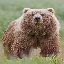

'panda'

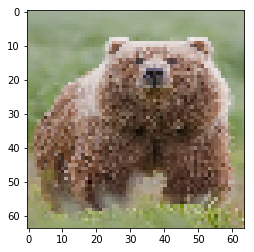

In [156]:
test_image = image.load_img('animal_dataset/prediction_set/bear.jpg', target_size=(64,64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier2.predict(test_image)
if result[0][0] == 1:
    prediction = 'panda'
else:
    prediction = 'not panda'
prediction

In [122]:
result

array([[1.]], dtype=float32)

In [123]:
test_image = image.load_img('animal_dataset/prediction_set/dog.jpeg', target_size=(64,64))

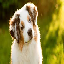

In [124]:
test_image

In [157]:
test_image = image.load_img('animal_dataset/prediction_set/dog.jpeg', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier2.predict(test_image)
if result[0][0] == 1:
    prediction = 'panda'
else:
    prediction = 'not panda'
prediction

'panda'

In [126]:
result

array([[1.]], dtype=float32)

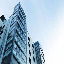

In [127]:
test_image = image.load_img('animal_dataset/prediction_set/building.jpeg', target_size=(64,64))
test_image

In [158]:
test_image = image.load_img('animal_dataset/prediction_set/building.jpeg', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier2.predict(test_image)
if result[0][0] == 1:
    prediction = 'panda'
else:
    prediction = 'not panda'
prediction

'panda'

In [129]:
result

array([[1.]], dtype=float32)

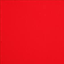

In [130]:
test_image = image.load_img('animal_dataset/prediction_set/red.jpeg', target_size=(64,64))
test_image

In [131]:
test_image = image.load_img('animal_dataset/prediction_set/dog.jpeg', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier2.predict(test_image)
if result[0][0] == 1:
    prediction = 'panda'
else:
    prediction = 'not panda'
prediction

'panda'

'panda'

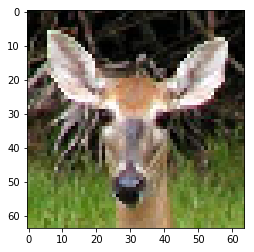

In [159]:
test_image = image.load_img('animal_dataset/training_set/not_panda/0000000005.jpg', target_size=(64,64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier2.predict(test_image)
if result[0][0] == 1:
    prediction = 'panda'
elif result[0][0] == 0:
    prediction = 'not panda'
prediction

In [135]:
import os

In [149]:
i = 0
count = 0
for x in os.listdir('animal_dataset/training_set/not_panda/'):
    if x != '.DS_Store':
        image_path = 'animal_dataset/training_set/not_panda/' + x

        test_image = image.load_img(image_path, target_size=(64,64))

        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        result = classifier2.predict(test_image)

        if result[0][0] == 1:
            prediction = 'panda'
        elif result[0][0] == 0:
            prediction = 'not panda'

        if prediction == 'not panda':
            i += 1
            print(prediction)
            print(image_path)
        if i == 10:
            print('count')
            print(count)
            print('not pandas')
            print(i)
            break
        count += 1

not panda
animal_dataset/training_set/not_panda/wolffrontal0014.jpg
not panda
animal_dataset/training_set/not_panda/pigfrontal0085.jpg
not panda
animal_dataset/training_set/not_panda/pigfrontal0062.jpg
not panda
animal_dataset/training_set/not_panda/mousefrontal0063.jpg
not panda
animal_dataset/training_set/not_panda/cat860a.jpg
not panda
animal_dataset/training_set/not_panda/7-scaly-naped_pigeon.jpg
not panda
animal_dataset/training_set/not_panda/monkeyfrontal0088.jpg
not panda
animal_dataset/training_set/not_panda/dog000639a.jpg
not panda
animal_dataset/training_set/not_panda/0000000082.jpg
not panda
animal_dataset/training_set/not_panda/mousefrontal0054.jpg
count
1332
not pandas
10


In [ ]:
print('a')

In [25]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix()